**Statistik tahlil asoslari**

kutubxonalarni chaqirish

In [1]:
import pandas as pd
import numpy as np

# cleaning

dataframe yaratish

In [15]:
data = pd.DataFrame({
    'Yosh':[23,25,None,30],
    'Jins':['Erkak','Ayol','Ayol',None]
})
data

,Yosh,Jins
0,23.0,Erkak
1,25.0,Ayol
2,NaN,Ayol
3,30.0,None


ustunlar bo'yicha null qiymat sonlarini ko'rish

In [16]:
data.isnull().sum()

,0
Yosh,1
Jins,1


null qiymatlarni to'ldirish

In [22]:
data['Yosh'].fillna(data['Yosh'].mean(), inplace=True)
data['Jins'].fillna('Nomalum', inplace=True)

/tmp/ipython-input-22-1149988862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Yosh'].fillna(data['Yosh'].mean(), inplace=True)
/tmp/ipython-input-22-1149988862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [24]:
data

,Yosh,Jins
0,23.0,Erkak
1,25.0,Ayol
2,26.0,Ayol
3,30.0,Nomalum


| Ko‘rsatkich         | Ma’nosi                             | Formula / Izoh                   |
| ------------------- | ----------------------------------- | -------------------------------- |
| **O‘rtacha (Mean)** | Umumiy qiymat darajasi              | (x₁ + x₂ + ... + xₙ) / n         |
| **Mediana**         | O‘rtadagi qiymat (safga qo‘yiladi)  | Masalan: \[2, 3, 5] → 3          |
| **Modus**           | Eng ko‘p uchraydigan qiymat         | Masalan: \[3, 3, 4, 5] → 3       |
| **Dispersiya**      | O‘rtachadan qanchaga chetga chiqadi | V = Σ(x - mean)² / n             |
| **Standart og‘ish** | Tarqoqlik darajasi (√dispersiya)    | Ma’lumot bir xilmi yoki tarqoqmi |
| **Minimum/Maximum** | Eng kichik/katta qiymat             | min(), max() funksiyalari bilan  |


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yosh    4 non-null      float64
 1   Jins    4 non-null      object 
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


In [29]:
data.describe()

,Yosh
count,4.00000
mean,26.00000
std,2.94392
min,23.00000
25%,24.50000
50%,25.50000
75%,27.00000
max,30.00000


In [30]:
baholar = pd.Series([3, 5, 4, 5, 2, 5, 4, 4])

print("Ma’lumot:", baholar.tolist())
print("O‘rtacha (mean):", baholar.mean())
print("Mediana:", baholar.median())
print("Modus:", baholar.mode()[0])
print("Minimum:", baholar.min())
print("Maximum:", baholar.max())
print("Standart og‘ish:", baholar.std())


Ma’lumot: [3, 5, 4, 5, 2, 5, 4, 4]
O‘rtacha (mean): 4.0
Mediana: 4.0
Modus: 4
Minimum: 2
Maximum: 5
Standart og‘ish: 1.0690449676496976


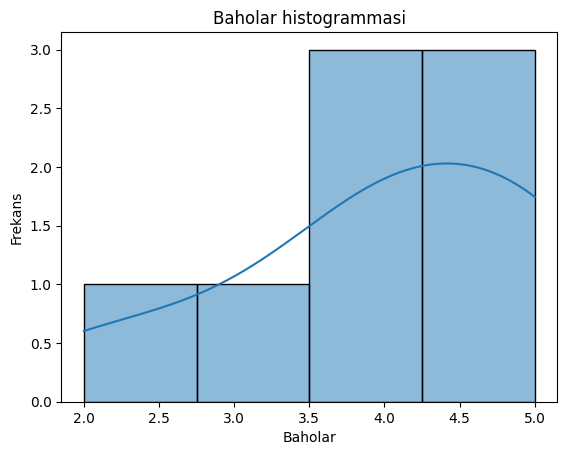

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(baholar, bins=4, kde=True)
plt.title("Baholar histogrammasi")
plt.xlabel("Baholar")
plt.ylabel("Frekans")
plt.show()

Ehtimollik — biror hodisaning yuz berish ehtimoli. Har doim 0 ≤ P ≤ 1 bo‘ladi.

P(A) = Hodisa(A) soni / Umumiy holatlar soni

| Ehtimollik | Ma’nosi                |
| ---------- | ---------------------- |
| **0**      | Umuman sodir bo‘lmaydi |
| **0.5**    | Yarim imkoniyat (50%)  |
| **1**      | Aniq sodir bo‘ladi     |


```
Tanga tashlash: P(gerb) = 0.5
```

```
Kubikda 3 chiqishi: P(3) = 1/6
```

Kubik tashlandi. 2 yoki 4 chiqish ehtimoli?
```
Yechim: P(2) + P(4) = 1/6 + 1/6 = 1/3
```


Biror hodisa sodir bo‘lmaslik ehtimoli:
P(A’) = 1 − P(A)

In [35]:
import random

# 1000 marta tanga tashlash
natijalar = [random.choice(['gerb', 'raqam']) for _ in range(1000)]
gerb_soni = natijalar.count('gerb')

print("Gerb chiqish ehtimoli:", gerb_soni / 1000)

Gerb chiqish ehtimoli: 0.472


| Turi                      | Izoh                                      | Misol                  |    |
| ------------------------- | ----------------------------------------- | ---------------------- | -- |
| **Oddiy** (basic)         | Bitta hodisaning ehtimoli                 | P(3 chiqishi)          |    |
| **Komplementar**          | A hodisa bo‘lmasligi: P(A') = 1 − P(A)    | P(6 chiqmasligi) = 5/6 |    |
| **Birgalikdagi**          | Ikki hodisaning birgalikda sodir bo‘lishi | P(A ∩ B)               |    |
| **Shartli (conditional)** | B hodisa sodir bo‘lganda A ning ehtimoli  | P(A                    | B) |


# Korrelatsiya va regressiya

**Korrelatsiya**

| r qiymati | Ma’nosi                  |
| --------- | ------------------------ |
| +1        | To‘liq musbat bog‘liqlik |
| 0         | Bog‘liqlik yo‘q          |
| -1        | To‘liq manfiy bog‘liqlik |
| \~0.7     | Kuchli musbat bog‘liqlik |
| \~−0.7    | Kuchli manfiy bog‘liqlik |


In [37]:
data = pd.DataFrame({
    'Yosh': [20, 22, 25, 28, 30],
    'Daromad': [2.5, 3.0, 4.0, 4.5, 5.0]
})

print("Korrelatsiya (r):")
print(data.corr())

Korrelatsiya (r):
             Yosh   Daromad
Yosh     1.000000  0.994169
Daromad  0.994169  1.000000


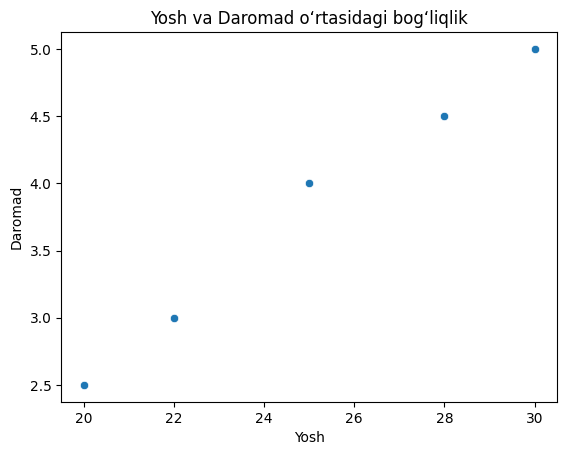

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Yosh', y='Daromad', data=data)
plt.title("Yosh va Daromad o‘rtasidagi bog‘liqlik")
plt.show()

**Regressiya**

Bir o‘zgaruvchi asosida ikkinchisini bashorat qilish.
Ya'ni: X → Y

Y = a + bX (chiziqli model)

In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array([20, 22, 25, 28, 30]).reshape(-1, 1)
y = np.array([2.5, 3.0, 4.0, 4.5, 5.0])

model = LinearRegression()
model.fit(X, y)

print("Koefitsient (b):", model.coef_[0])
print("Kesishuv (a):", model.intercept_)


Koefitsient (b): 0.25
Kesishuv (a): -2.45


In [40]:
yangi_yosh = np.array([[27]])
daromad_taxmini = model.predict(yangi_yosh)
print("27 yoshdagi odam daromadining taxmini:", daromad_taxmini[0])


27 yoshdagi odam daromadining taxmini: 4.3


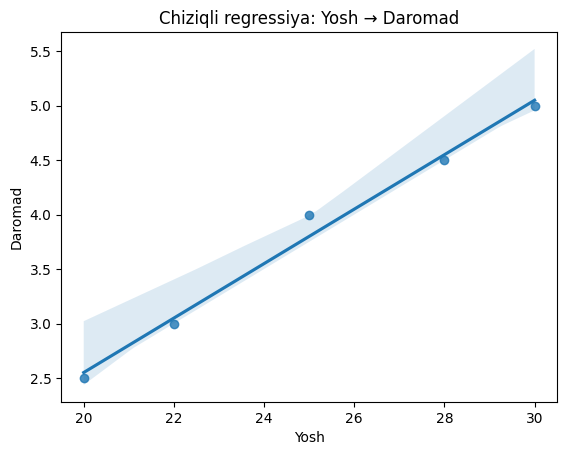

In [41]:
sns.regplot(x=X.flatten(), y=y)
plt.title("Chiziqli regressiya: Yosh → Daromad")
plt.xlabel("Yosh")
plt.ylabel("Daromad")
plt.show()


# loyiha

Talabalar baholari, o‘quv soati va uxlaydigan vaqt asosida o‘zaro bog‘liqlik va bahoga ta’sir omillarini aniqlash

In [42]:
data = pd.DataFrame({
    'Talaba': ['Ali', 'Laylo', 'Diyor', 'Zilola', 'Sardor', 'Malika', 'Bekzod', 'Aziza'],
    'Bahosi': [85, 90, 78, 92, 70, 88, 65, 95],
    'Oquv_soati': [3, 4, 2, 5, 1, 4, 1, 6],
    'Uyqu_soati': [7, 6, 8, 5, 9, 6, 10, 4]
})

In [43]:
data.describe()

,Bahosi,Oquv_soati,Uyqu_soati
count,8.000000,8.000000,8.00000
mean,82.875000,3.250000,6.87500
std,10.829028,1.832251,2.03101
min,65.000000,1.000000,4.00000
25%,76.000000,1.750000,5.75000
50%,86.500000,3.500000,6.50000
75%,90.500000,4.250000,8.25000
max,95.000000,6.000000,10.00000


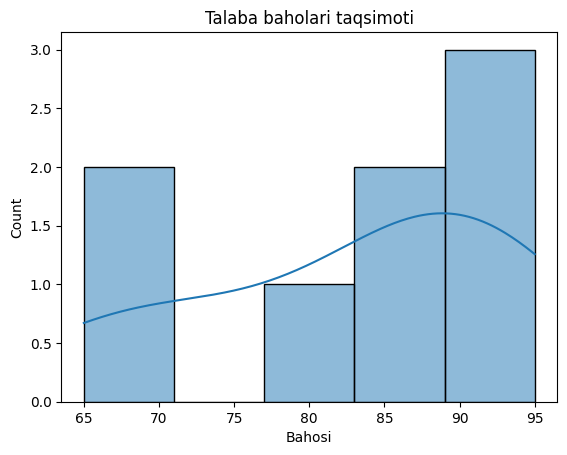

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Bahosi'], bins=5, kde=True)
plt.title("Talaba baholari taqsimoti")
plt.show()

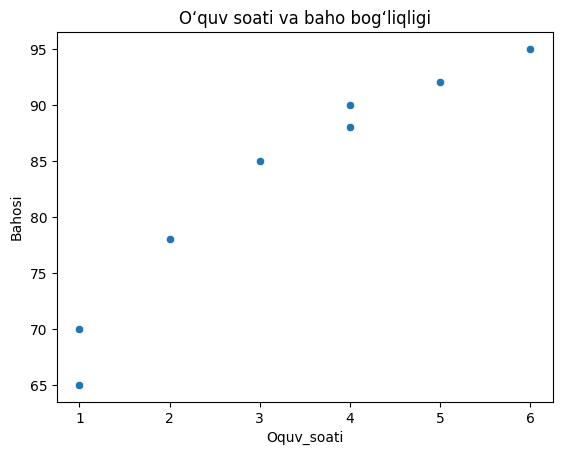

In [46]:
sns.scatterplot(x='Oquv_soati', y='Bahosi', data=data)
plt.title("O‘quv soati va baho bog‘liqligi")
plt.show()

              Bahosi  Oquv_soati  Uyqu_soati
Bahosi      1.000000    0.959389   -0.981605
Oquv_soati  0.959389    1.000000   -0.988513
Uyqu_soati -0.981605   -0.988513    1.000000


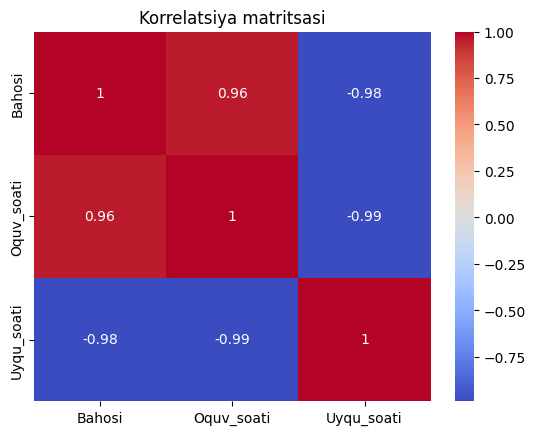

In [47]:
print(data.corr(numeric_only=True))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korrelatsiya matritsasi")
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = data['Oquv_soati'].values.reshape(-1, 1)
y = data['Bahosi'].values

model = LinearRegression()
model.fit(X, y)

print("Model: Baho = {:.2f} * Oquv_soati + {:.2f}".format(model.coef_[0], model.intercept_))

Model: Baho = 5.67 * Oquv_soati + 64.45


In [49]:
# Masalan, 3 soat o‘qigan talaba
taxmin = model.predict([[3]])
print("3 soat o‘qigan talabaning bashoratli bahosi:", round(taxmin[0], 1))

3 soat o‘qigan talabaning bashoratli bahosi: 81.5


Tahlilga ko'ra, o'rtacha baho 82.8 bo'lib, o'quv soati bahoga kuchli musbat ta'sir qiladi (r=0.9). Uxlash soatining salbiy korrelatsiyasi esa -0.78. Demak, ko'p o'qish va kam uxlash yuqori baho olishga olib kelmoqda.